In [33]:
import numpy as np
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%matplotlib inline

In [36]:
df = pd.read_csv('MagicBricks.csv')

In [37]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6667
1,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,6667
2,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,6667
3,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,6667
4,1300.0,4,3,Semi-Furnished,Rohini Sector 24,1,15500000,Ready_to_move,New_Property,Builder_Floor,6667


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1005 non-null   float64
 1   BHK          1005 non-null   int64  
 2   Bathroom     1005 non-null   int64  
 3   Furnishing   1005 non-null   object 
 4   Locality     1005 non-null   object 
 5   Parking      1005 non-null   int64  
 6   Price        1005 non-null   int64  
 7   Status       1005 non-null   object 
 8   Transaction  1005 non-null   object 
 9   Type         1005 non-null   object 
 10  Per_Sqft     1005 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.5+ KB


In [39]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.000000
mean,1504.301968,2.791045,2.575124,1.697512,2.224030e+07,15663.630846
std,1729.104830,0.961469,1.088503,3.223118,2.771744e+07,21170.160448
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,770.000000,2.000000,2.000000,1.000000,5.130000e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.000000,1.400000e+07,11363.000000
75%,1700.000000,3.000000,3.000000,2.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,39.000000,2.400000e+08,183333.000000


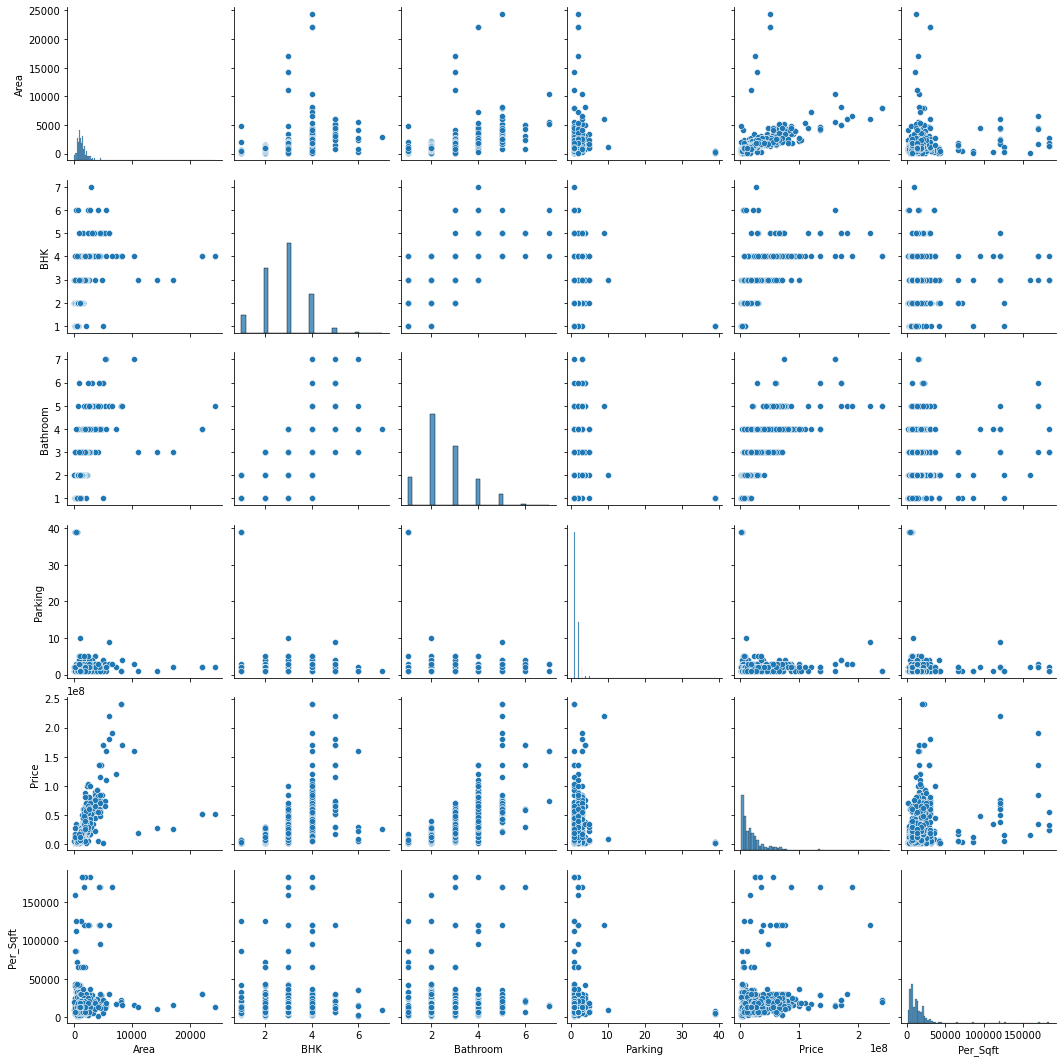

In [40]:
sns.pairplot(df)

C:\Users\khera\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

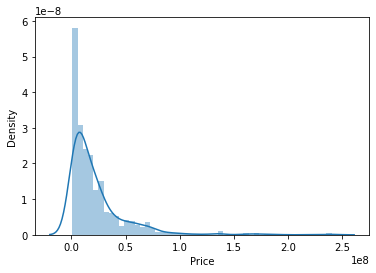

In [41]:
sns.distplot(df['Price'])

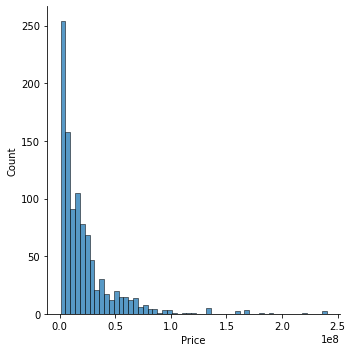

In [42]:
sns.displot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

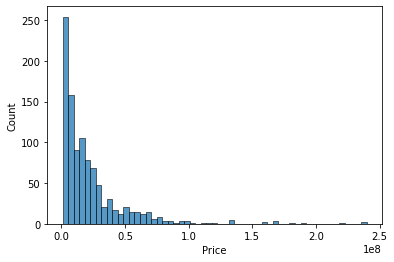

In [43]:
sns.histplot(df['Price'])

In [44]:
df.corr()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.463013,0.535153,0.004128,0.574410,0.165277
BHK,0.463013,1.000000,0.811590,-0.085984,0.599587,0.181284
Bathroom,0.535153,0.811590,1.000000,-0.030707,0.732241,0.220475
Parking,0.004128,-0.085984,-0.030707,1.000000,0.035894,0.001607
Price,0.574410,0.599587,0.732241,0.035894,1.000000,0.325240
Per_Sqft,0.165277,0.181284,0.220475,0.001607,0.325240,1.000000


<AxesSubplot:>

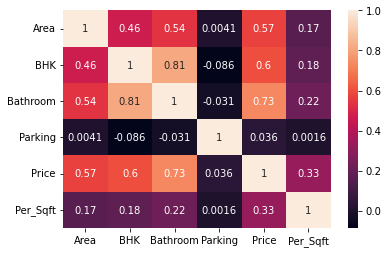

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [47]:
X = df[['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']]

In [48]:
y = df['Price']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
print(lm.intercept_)

-22861666.657133773


In [55]:
lm.coef_

array([2.44010290e+03, 6.78744981e+05, 1.35977076e+07, 3.38938376e+05,
       1.83152332e+02])

In [58]:
cdf = pd.DataFrame(lm.coef_, X.columns,columns=['coeff'])

In [59]:
cdf.head()

,coeff
Area,2.440103e+03
BHK,6.787450e+05
Bathroom,1.359771e+07
Parking,3.389384e+05
Per_Sqft,1.831523e+02


In [60]:
cdf

,coeff
Area,2.440103e+03
BHK,6.787450e+05
Bathroom,1.359771e+07
Parking,3.389384e+05
Per_Sqft,1.831523e+02


In [62]:
predictions = lm.predict(X_test)

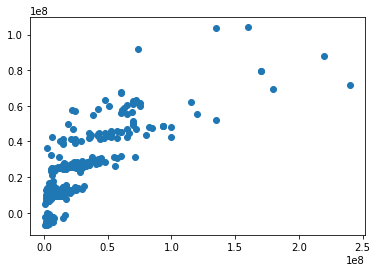

In [65]:
plt.scatter(y_test,predictions)

C:\Users\khera\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

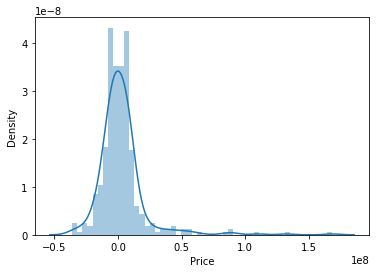

In [66]:
sns.distplot((y_test-predictions))

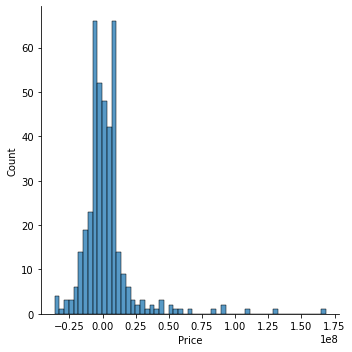

In [67]:
sns.displot((y_test-predictions))

<AxesSubplot:xlabel='Price', ylabel='Count'>

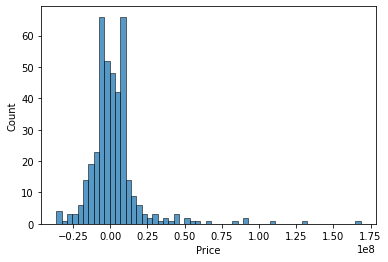

In [68]:
sns.histplot((y_test-predictions))

NameError: name 'best_clf' is not defined